# Importing Packages and Inicial Data Preview

In [1]:
# Importing packages

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import copy

from itertools import combinations
from scipy.stats import skew, chi2_contingency, mannwhitneyu, spearmanr

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from collections import Counter

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [2]:
# loading datasets
path_2 = "datasets/diabetes_binary_health_indicators_BRFSS2015.csv"
path_3 = "datasets/diabetes_012_health_indicators_BRFSS2015.csv"

df = pd.read_csv(path_2)
df_t = pd.read_csv(path_3)

In [3]:
df.shape

(253680, 22)

In [4]:
df.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# Exploratory Data Analysis

### Data Overview

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [8]:
df_t.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [9]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [10]:
missing_percentage = df.isna().sum().sort_values(ascending = False) / len(df) * 100
missing_percentage

Diabetes_binary         0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64

In [11]:
df.duplicated().sum()

np.int64(24206)

In [12]:
df.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

### Inicial Target Variable Exploration

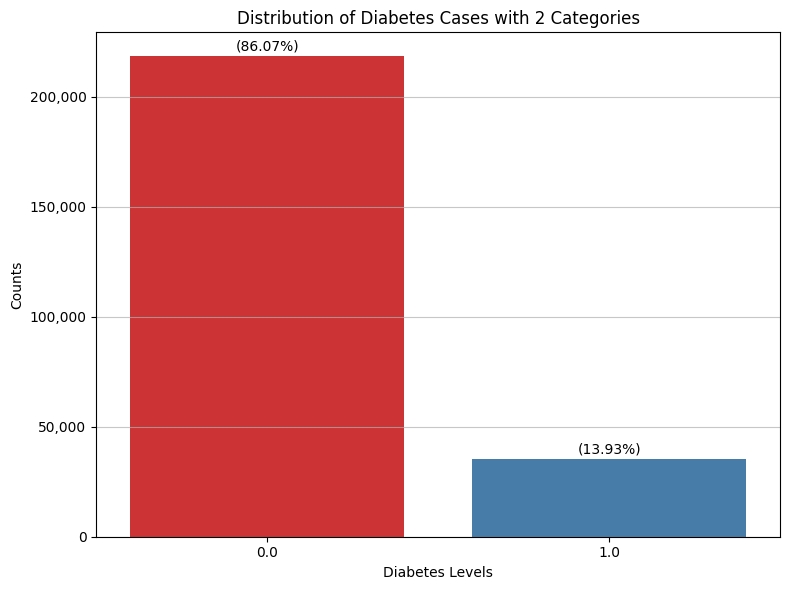

In [13]:
# == Binaty Dataset ==
# What is the proportion of people with and without diabetes?

diabetes_count = df['Diabetes_binary'].value_counts().sort_index()
total_cases = df.shape[0]
diabetes_percentage = (diabetes_count / total_cases) * 100

diabetes_df = pd.DataFrame({
    'Diabetes_binary': diabetes_count.index,
    'Counts': diabetes_count.values,
    'Percentage': diabetes_percentage.values
})

plt.figure(figsize=(8, 6))
sns.barplot(data=diabetes_df, x = "Diabetes_binary", y="Counts", hue="Diabetes_binary" , palette="Set1", legend=False)
for i, row in diabetes_df.iterrows():
    plt.text(i, row['Counts'] + total_cases * 0.01,
             f"({row['Percentage']:.2f}%)", 
             ha='center') 
    
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.title('Distribution of Diabetes Cases with 2 Categories')
plt.xlabel('Diabetes Levels')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

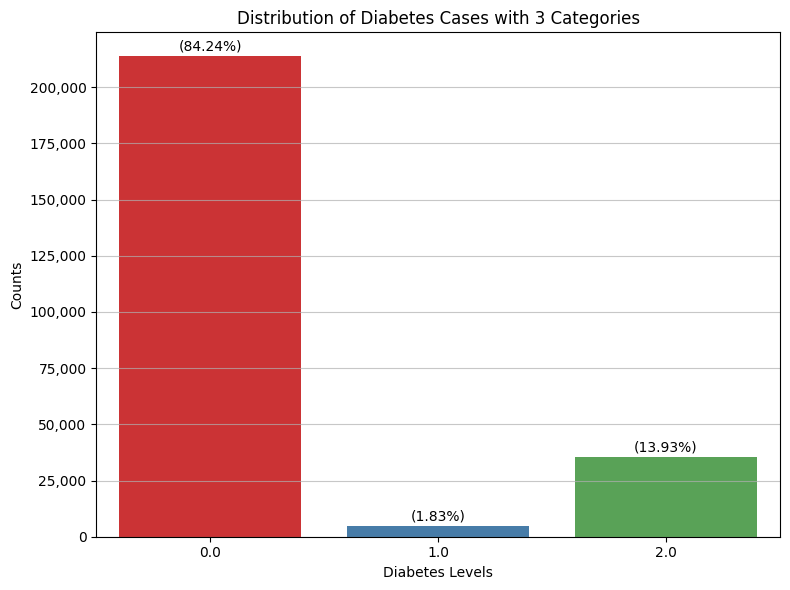

In [14]:
# == Ternary Dataset ==
# What is the proportion of people with and without diabetes?

diabetes_count = df_t['Diabetes_012'].value_counts().sort_index()
total_cases = df_t.shape[0]
diabetes_percentage = (diabetes_count / total_cases) * 100

diabetest_df_t = pd.DataFrame({
    'Diabetes_012': diabetes_count.index,
    'Counts': diabetes_count.values,
    'Percentage': diabetes_percentage.values
})

plt.figure(figsize=(8, 6))
sns.barplot(data=diabetest_df_t, x = "Diabetes_012", y="Counts", hue="Diabetes_012", palette="Set1", legend=False)
for i, row in diabetest_df_t.iterrows():    
    plt.text(i, row['Counts'] + total_cases * 0.01,
             f"({row['Percentage']:.2f}%)", 
             ha='center') 
    
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.title('Distribution of Diabetes Cases with 3 Categories')
plt.xlabel('Diabetes Levels')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

### Univariate Analysis

In [15]:
# Random sampling for better use of heatmaps
df_sampled = df.sample(n=50000, random_state=42)

df_t_sampled = df_t.sample(n=50000, random_state=42)

# Thresholds
binary_threshold = 2    
categorical_threshold = 15

# Features
all_features = df.select_dtypes(include='number').columns.tolist()

binary_features = [x for x in all_features if df.nunique()[x]==binary_threshold]

numeric_features = [col for col in all_features 
                    if df[col].nunique() == binary_threshold or df[col].nunique() > categorical_threshold]

categorical_features = [col for col in all_features if col not in numeric_features]

continuous_features = ["BMI", "MentHlth", "PhysHlth"]

categorical_features.append("Diabetes_binary")

print(continuous_features)
print(categorical_features)
print(binary_features)
print(numeric_features)

['BMI', 'MentHlth', 'PhysHlth']
['GenHlth', 'Age', 'Education', 'Income', 'Diabetes_binary']
['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex']


In [16]:
# Distribution of Binary features by percentage

for col in binary_features:
    print(df[col].value_counts(normalize=True) * 100)

Diabetes_binary
0.0    86.066698
1.0    13.933302
Name: proportion, dtype: float64
HighBP
0.0    57.09989
1.0    42.90011
Name: proportion, dtype: float64
HighChol
0.0    57.587906
1.0    42.412094
Name: proportion, dtype: float64
CholCheck
1.0    96.26695
0.0     3.73305
Name: proportion, dtype: float64
Smoker
0.0    55.683144
1.0    44.316856
Name: proportion, dtype: float64
Stroke
0.0    95.94292
1.0     4.05708
Name: proportion, dtype: float64
HeartDiseaseorAttack
0.0    90.581441
1.0     9.418559
Name: proportion, dtype: float64
PhysActivity
1.0    75.654368
0.0    24.345632
Name: proportion, dtype: float64
Fruits
1.0    63.425576
0.0    36.574424
Name: proportion, dtype: float64
Veggies
1.0    81.14199
0.0    18.85801
Name: proportion, dtype: float64
HvyAlcoholConsump
0.0    94.380322
1.0     5.619678
Name: proportion, dtype: float64
AnyHealthcare
1.0    95.105251
0.0     4.894749
Name: proportion, dtype: float64
NoDocbcCost
0.0    91.582308
1.0     8.417692
Name: proportion, dty

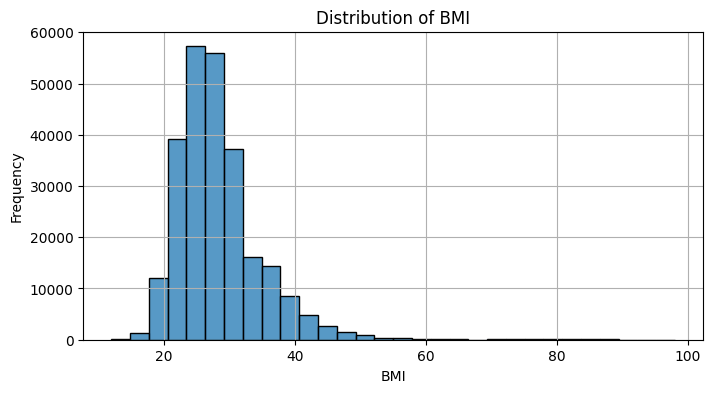

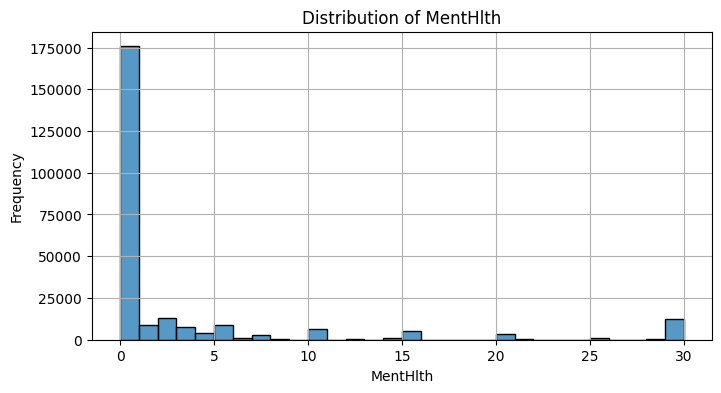

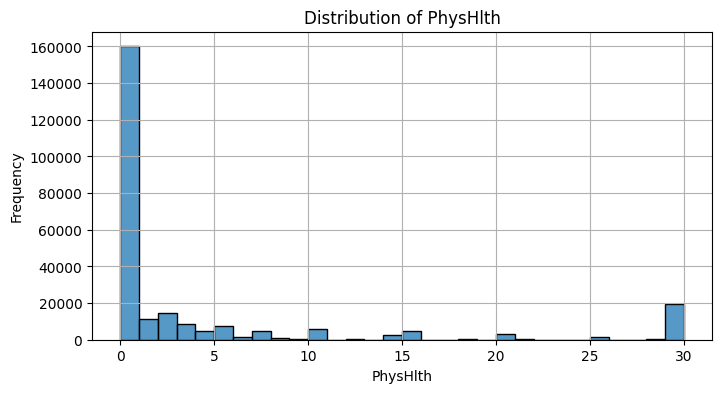

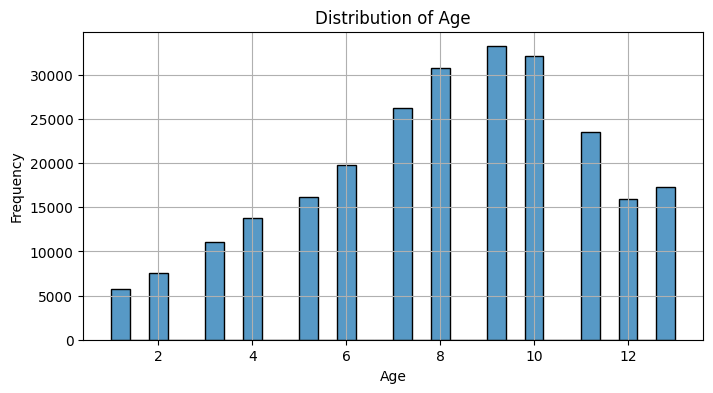

In [17]:
# Distribution of Continuous features and Age

cont_age_features = copy.deepcopy(continuous_features)

cont_age_features.append("Age")

for col in cont_age_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

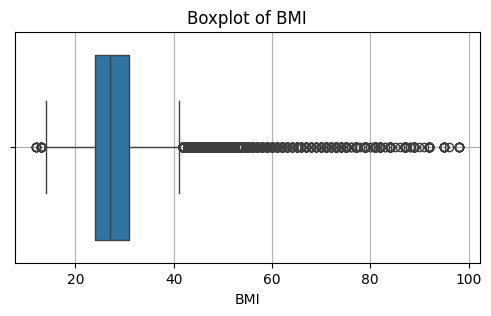

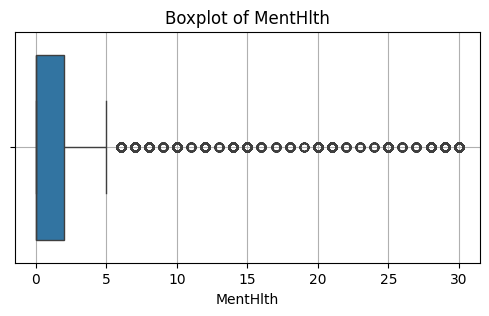

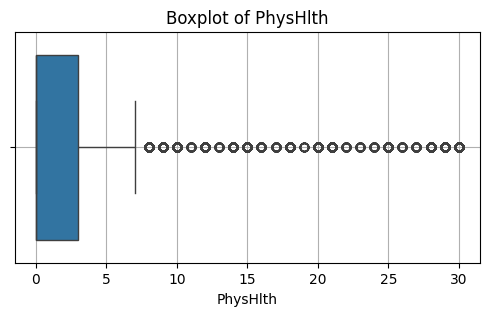

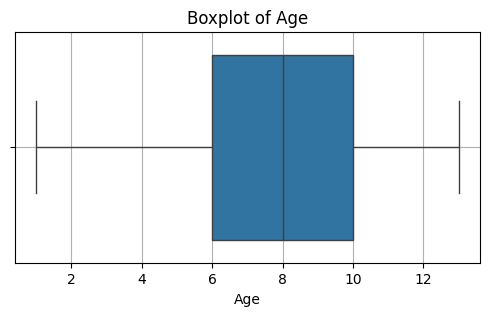

In [18]:
# Distribution of Continuos features and Age

for col in cont_age_features:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.grid(True)
    plt.show()

In [19]:
# Calculate skewness
# Better use Non-parametric tests more ahead

for col in all_features:
    print(f"{col} skewness: {df[col].skew():.2f}")

Diabetes_binary skewness: 2.08
HighBP skewness: 0.29
HighChol skewness: 0.31
CholCheck skewness: -4.88
BMI skewness: 2.12
Smoker skewness: 0.23
Stroke skewness: 4.66
HeartDiseaseorAttack skewness: 2.78
PhysActivity skewness: -1.20
Fruits skewness: -0.56
Veggies skewness: -1.59
HvyAlcoholConsump skewness: 3.85
AnyHealthcare skewness: -4.18
NoDocbcCost skewness: 3.00
GenHlth skewness: 0.42
MentHlth skewness: 2.72
PhysHlth skewness: 2.21
DiffWalk skewness: 1.77
Sex skewness: 0.24
Age skewness: -0.36
Education skewness: -0.78
Income skewness: -0.89


### Bivariate Analysis

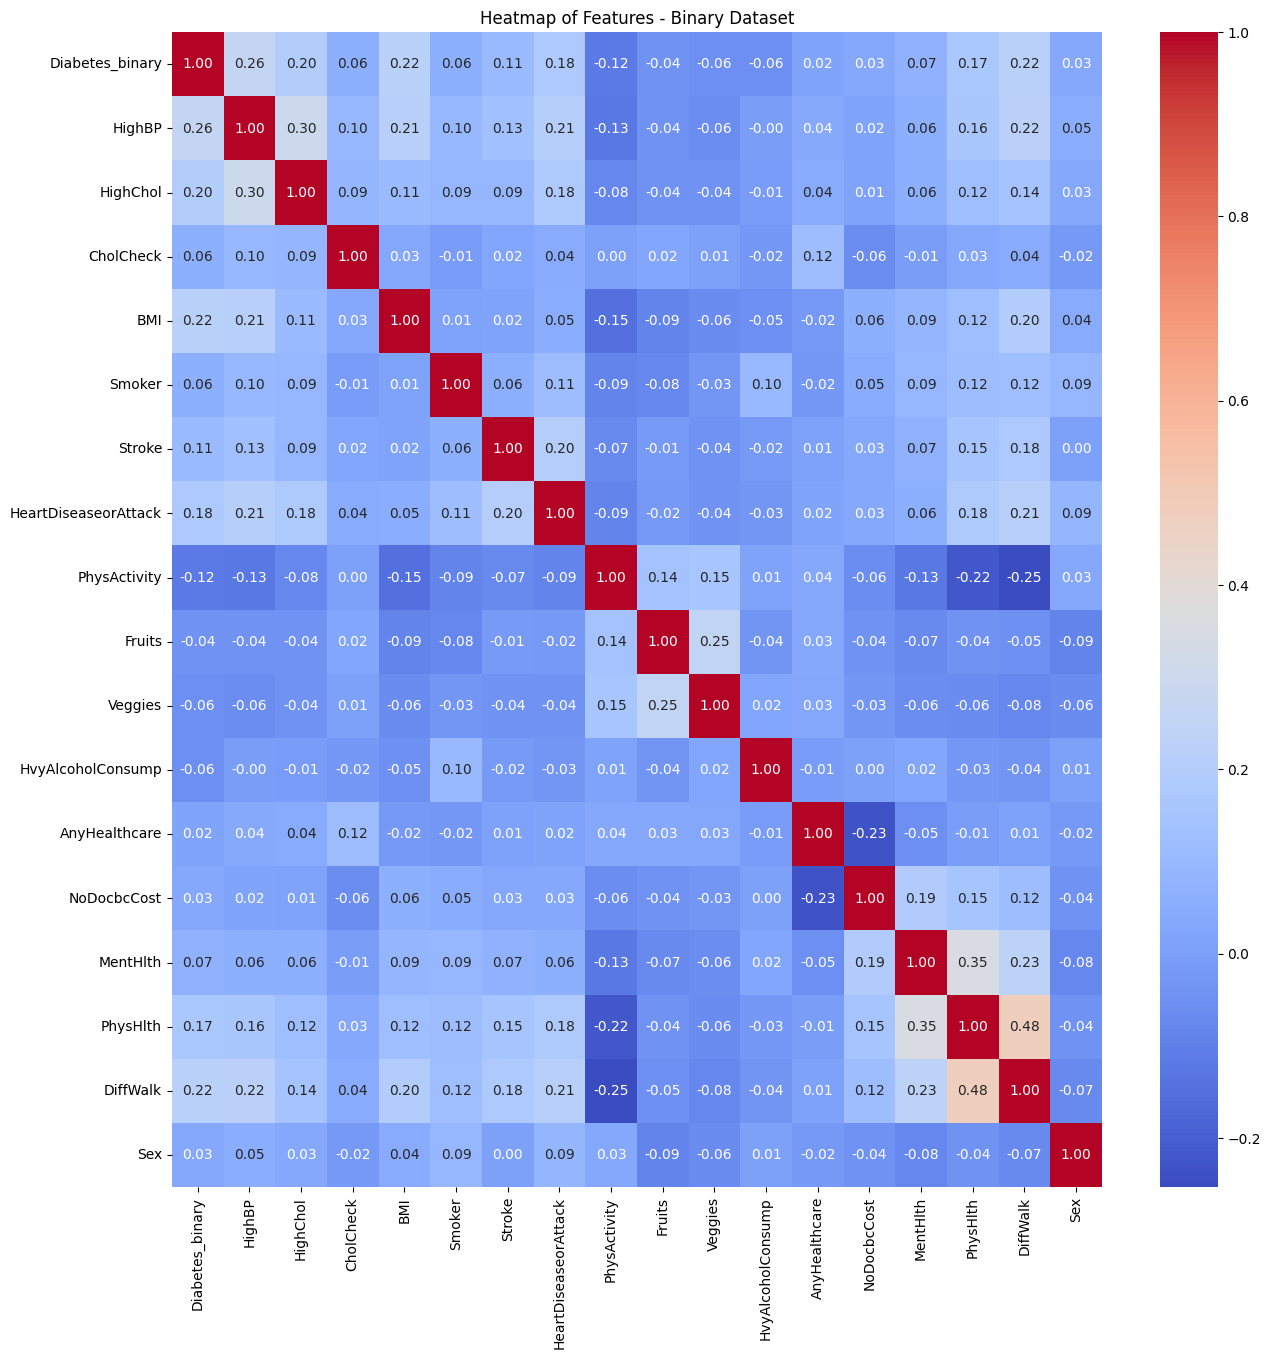

In [20]:
# There are any feature that correlates with target directly (linearity) or with each other?

corr = df[numeric_features].corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Features - Binary Dataset")
plt.show()

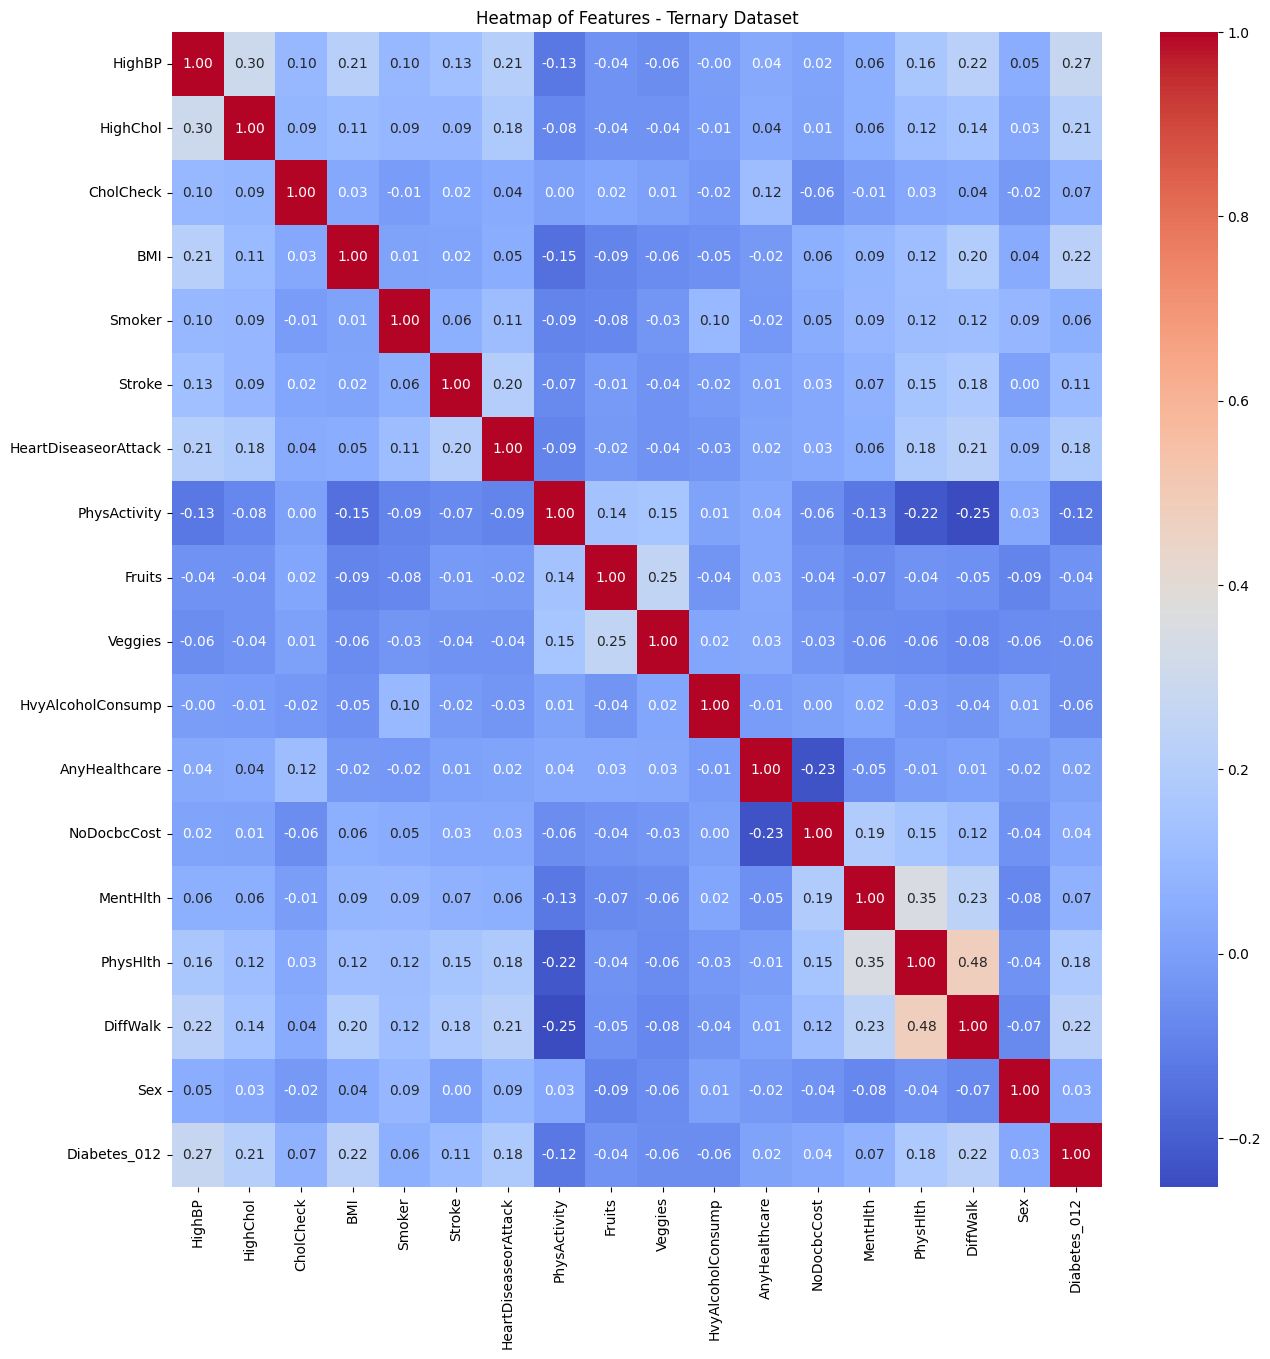

In [21]:
# There are any feature that correlates with target directly (linearity) or with each other?

numeric_features_t = copy.deepcopy(numeric_features)

numeric_features_t.remove("Diabetes_binary")
numeric_features_t.append("Diabetes_012")

corr = df_t[numeric_features_t].corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Features - Ternary Dataset")
plt.show()

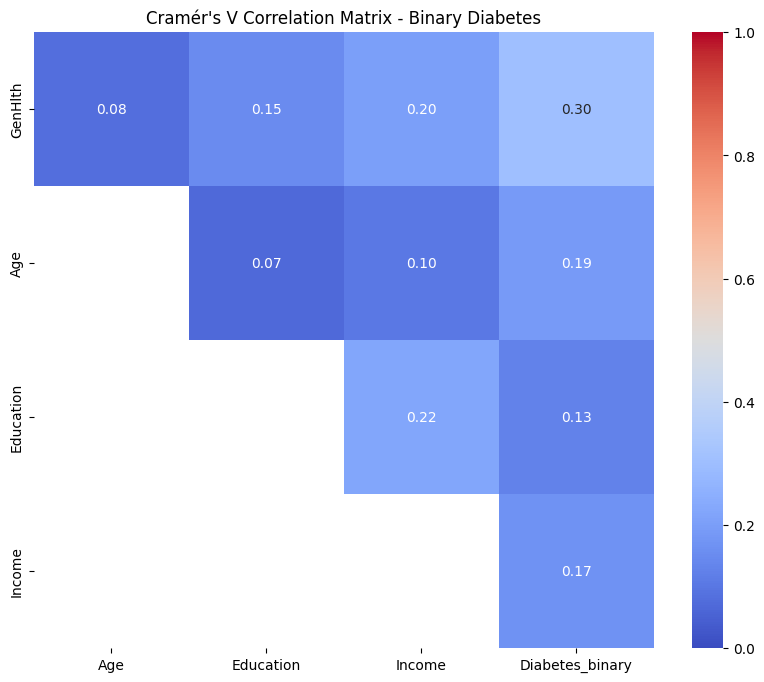

In [22]:
# Is there a relashionship between categorical features?

# Use of Cramer's V correlation to check the correlation between categorical features
# Implementation by: https://www.geeksforgeeks.org/calculate-cramer-s-coefficient-matrix-using-pandas/
# Improved by Pedro Silva [heatmap + combinations]

def cramers_v(x, y):
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)
    chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Calculate Cramer's V
    n = contingency_table.sum().sum()

    if n <= 1 or contingency_table.shape[0] < 2 or contingency_table.shape[1] < 2:
        return np.nan

    phi2 = chi2_statistic / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    k_corr = k - (k - 1) * (k - 2) / (n - 1)
    r_corr = r - (r - 1) * (r - 2) / (n - 1)

    if min(k_corr - 1, r_corr - 1) == 0:
        return np.nan

    v = np.sqrt(phi2corr / min(k_corr - 1, r_corr - 1))
    
    return v

# Initialize a DataFrame to store the results
cramers_v_matrix = pd.DataFrame(index=categorical_features, columns=categorical_features)

# Calculate Cramér's V for each pair of variables
for var1, var2 in combinations(categorical_features, 2):
    cramers_v_matrix.loc[var1, var2] = cramers_v(df_sampled[var1], df_sampled[var2])

cramers_v_matrix = cramers_v_matrix.astype(float)
cramers_v_matrix.dropna(how='all', inplace=True)
cramers_v_matrix.dropna(axis=1, how='all', inplace=True)

plt.figure(figsize=(10, 8))  

sns.heatmap(cramers_v_matrix, 
            annot=True,
            cmap="coolwarm",
            fmt=".2f",
            vmin=0, vmax=1)

plt.title("Cramér's V Correlation Matrix - Binary Diabetes")
plt.show()

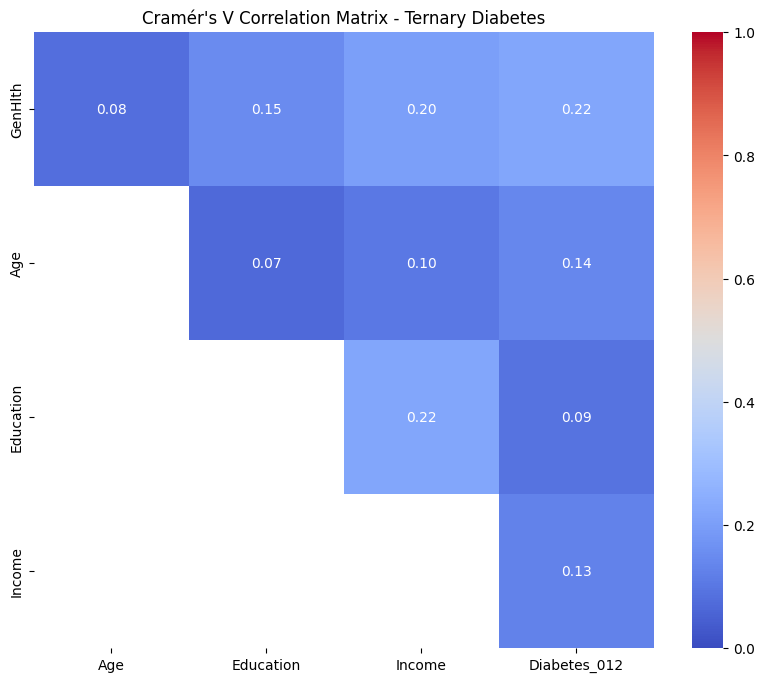

In [23]:
categorical_features_t = copy.deepcopy(categorical_features)

categorical_features_t.remove("Diabetes_binary")
categorical_features_t.append("Diabetes_012")

# Initialize a DataFrame to store the results
cramers_v_matrix = pd.DataFrame(index=categorical_features_t, columns=categorical_features_t)

# Calculate Cramér's V for each pair of variables
for var1, var2 in combinations(categorical_features_t, 2):
    cramers_v_matrix.loc[var1, var2] = cramers_v(df_t_sampled[var1], df_t_sampled[var2])

cramers_v_matrix = cramers_v_matrix.astype(float)
cramers_v_matrix.dropna(how='all', inplace=True)
cramers_v_matrix.dropna(axis=1, how='all', inplace=True)

plt.figure(figsize=(10, 8))  

sns.heatmap(cramers_v_matrix, 
            annot=True,
            cmap="coolwarm",
            fmt=".2f",
            vmin=0, vmax=1)

plt.title("Cramér's V Correlation Matrix - Ternary Diabetes")
plt.show()

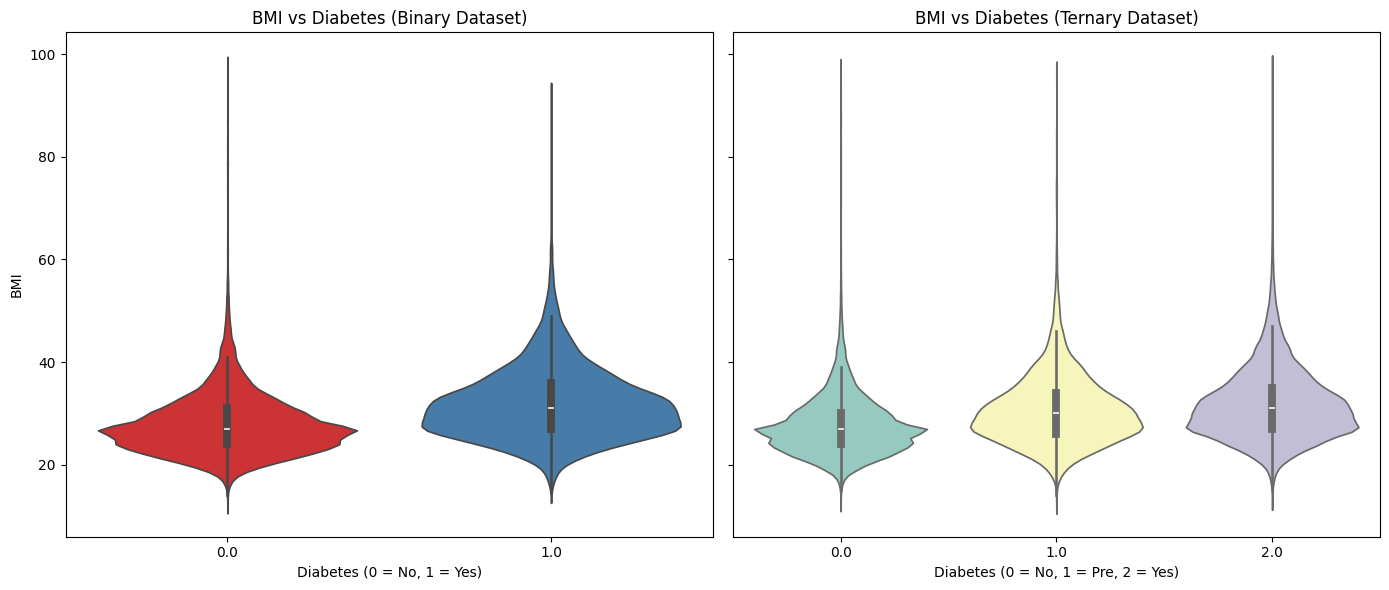

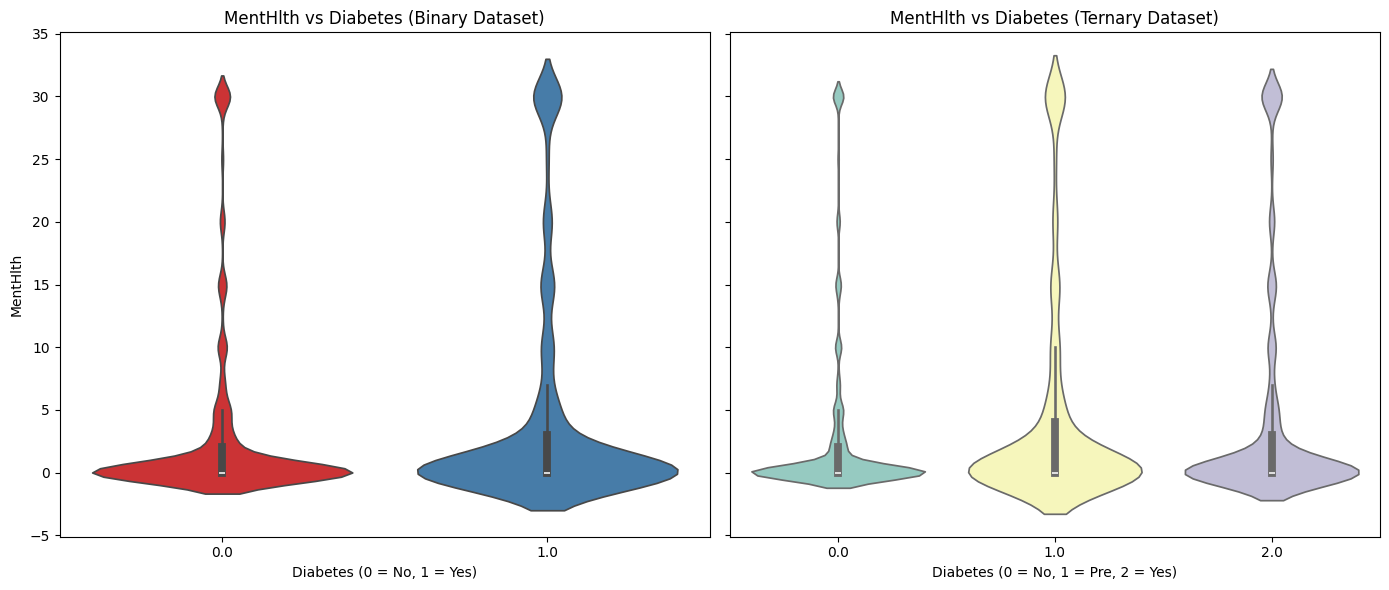

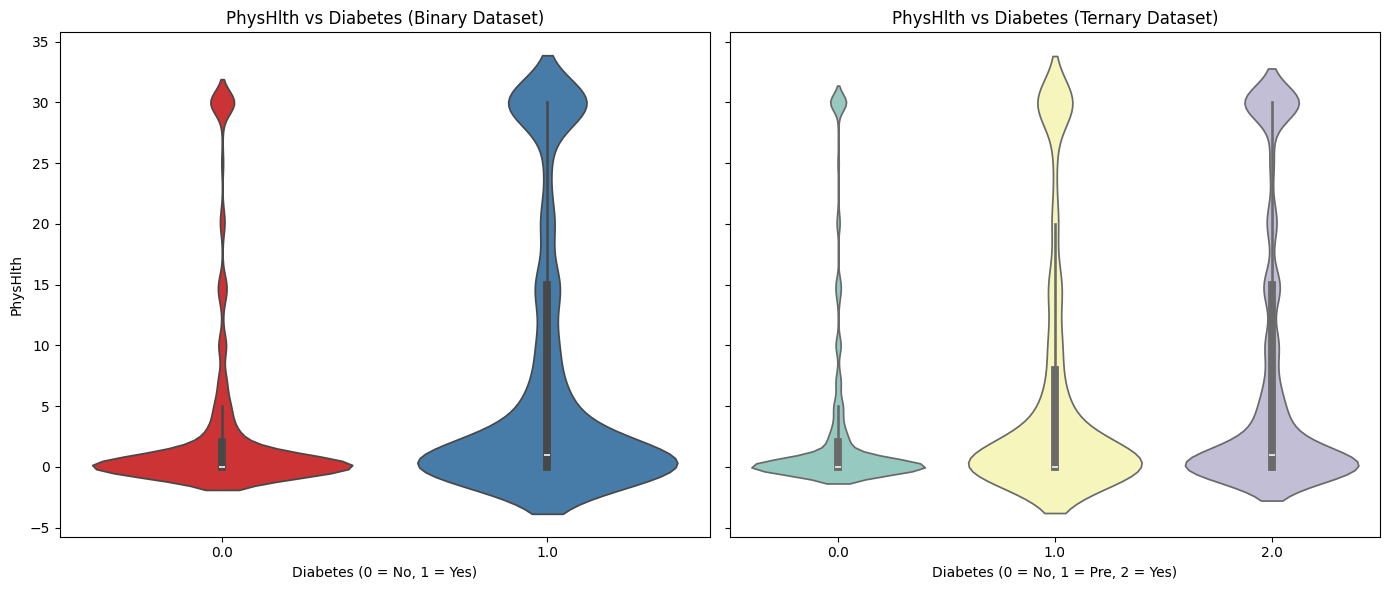

In [24]:
# Checking for potential relationships between continuous features and the binary/ternary diabetes.

for col in continuous_features:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # Left plot: binary dataset
    sns.violinplot(
        x="Diabetes_binary", y=col, data=df_sampled, legend=False,
        inner="box", palette="Set1", hue="Diabetes_binary", ax=axes[0]
    )
    axes[0].set_title(f"{col} vs Diabetes (Binary Dataset)")
    axes[0].set_xlabel("Diabetes (0 = No, 1 = Yes)")
    axes[0].set_ylabel(col)

    # Right plot: ternary dataset
    sns.violinplot(
        x="Diabetes_012", y=col, data=df_t, legend=False,
        inner="box", palette="Set3", hue="Diabetes_012", ax=axes[1]
    )
    axes[1].set_title(f"{col} vs Diabetes (Ternary Dataset)")
    axes[1].set_xlabel("Diabetes (0 = No, 1 = Pre, 2 = Yes)")
    axes[1].set_ylabel("")

    plt.tight_layout()
    plt.show()

Chi2 = 937.06, p-value = 0.0000



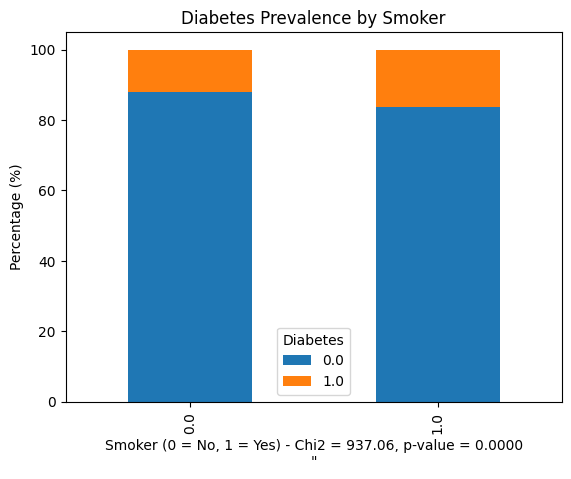

Chi2 = 825.12, p-value = 0.0000



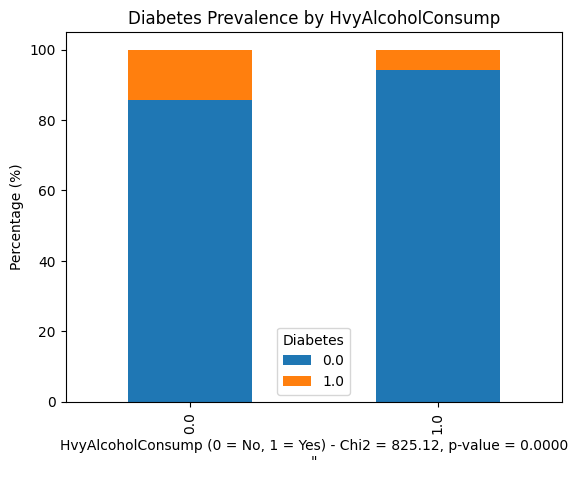

Chi2 = 3539.42, p-value = 0.0000



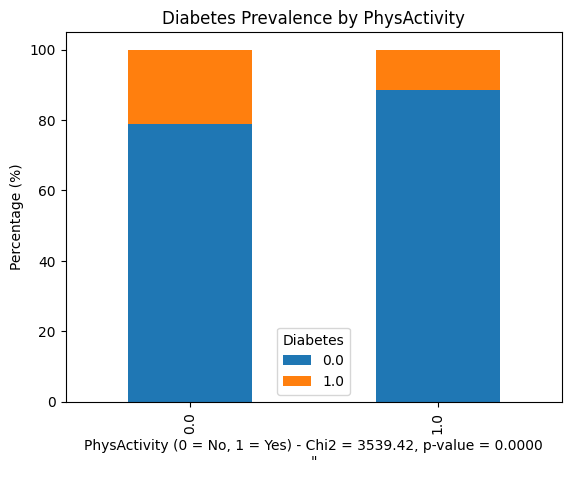

In [25]:
# How does smoking, alcohol use, or physical activity relate to diabetes?

features1 =  ["Smoker", "HvyAlcoholConsump", "PhysActivity"]

for feature in features1:

    table = pd.crosstab(df[feature], df['Diabetes_binary'], normalize='index') * 100

    # Chi-Square Test
    contingency_table = pd.crosstab(df[feature], df['Diabetes_binary'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    stat = f"Chi2 = {chi2:.2f}, p-value = {p:.4f}\n"
    print(stat)

    table.plot(kind='bar', stacked=True)
    plt.title(f'Diabetes Prevalence by {feature}')
    plt.ylabel('Percentage (%)')
    plt.xlabel(f'{feature} (0 = No, 1 = Yes) - {stat}"')
    plt.legend(title='Diabetes')
    plt.show()

In [26]:
# Are smokers more likely to consume alcohol?

# Given that the p-value is 0.0000e+00, which is well below the typical significance threshold of 0.05, 
# we can conclude that there is a statistically significant relationship between smoking and heavy alcohol consumption. 
# This suggests that smokers are more likely to consume alcohol heavily compared to non-smokers in this dataset.

contingency_table = pd.crosstab(df['Smoker'], df['HvyAlcoholConsump'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test: Chi2 = {chi2:.4f}, p = {p_value:.4e}")

Chi-Square Test: Chi2 = 2618.7022, p = 0.0000e+00


In [27]:
# Are older people more likely to have High Cholesterol? 

#The p-value of 0.000 indicates a statistically significant difference in age between individuals with high cholesterol and those without. 
# This suggests that older people are more likely to have high cholesterol in this dataset.

older_highchol = df[df['HighChol'] == 1]['Age']
older_nohighchol = df[df['HighChol'] == 0]['Age']

u_stat, p_value = mannwhitneyu(older_highchol, older_nohighchol, alternative='two-sided')

print(f"Mann-Whitney U Test: U-statistic = {u_stat:.4e}, p = {p_value:.4e}")

Mann-Whitney U Test: U-statistic = 1.0293e+10, p = 0.0000e+00


In [28]:
# Are people with bad physical health having mental health?

# Physical Health vs Mental Health
#Spearman Correlation (ρ = 0.31, p < 0.0001):
#There is a moderate positive correlation between the number of days individuals report poor physical health 
# and poor mental health. As the number of physically unhealthy days increases, individuals are also more likely to report more mentally 
# unhealthy days.
#
#Pearson Correlation (r = 0.35):
#A moderate positive linear relationship was also observed between physical and mental health, ~
# suggesting that people who experience worse physical health may also experience worse mental health.
#
#Conclusion:
#These findings indicate that poor physical health is associated with poorer mental health, 
# reflecting the potential impact of physical well-being on overall mental health. Both correlations suggest a moderate relationship 
# between the two, though the exact nature of the relationship may depend on individual factors and the way these health aspects 
# are intertwined.

spearman_corr, p_value = spearmanr(df['PhysHlth'], df['MentHlth'])

print(f"Spearman Correlation: rho = {spearman_corr:.4f}, p = {p_value:.4e}")

Spearman Correlation: rho = 0.3081, p = 0.0000e+00



There is a significant association between Health Care and Sex (p-value < 0.05).


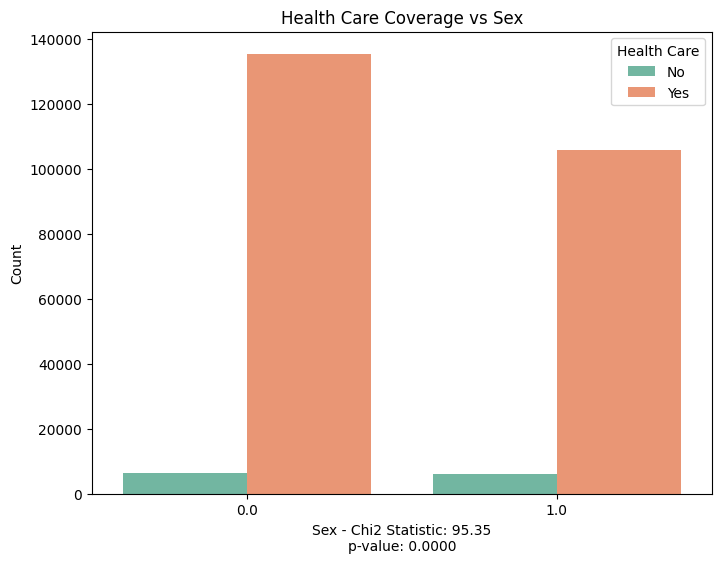

In [29]:
contingency_table = pd.crosstab(df['AnyHealthcare'], df['Sex'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Interpretation of p-value
if p_value < 0.05:
    print("\nThere is a significant association between Health Care and Sex (p-value < 0.05).")
else:
    print("\nThere is no significant association between Health Care and Sex (p-value >= 0.05).")

plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='AnyHealthcare', data=df, palette="Set2")
plt.title("Health Care Coverage vs Sex")
plt.xlabel(f"Sex - Chi2 Statistic: {chi2:.2f}\np-value: {p_value:.4f}")
plt.ylabel("Count")
plt.legend(title='Health Care', labels=['No', 'Yes'])
plt.show()

Mann-Whitney U Test Results for BMI vs Fruits:
U statistic: 6606217777.00, p-value: 0.0000

Mann-Whitney U Test Results for BMI vs Veggies:
U statistic: 4430070383.00, p-value: 0.0000

There is a significant difference in BMI between people who consume fruits regularly and those who don't.

There is a significant difference in BMI between people who consume vegetables regularly and those who don't.


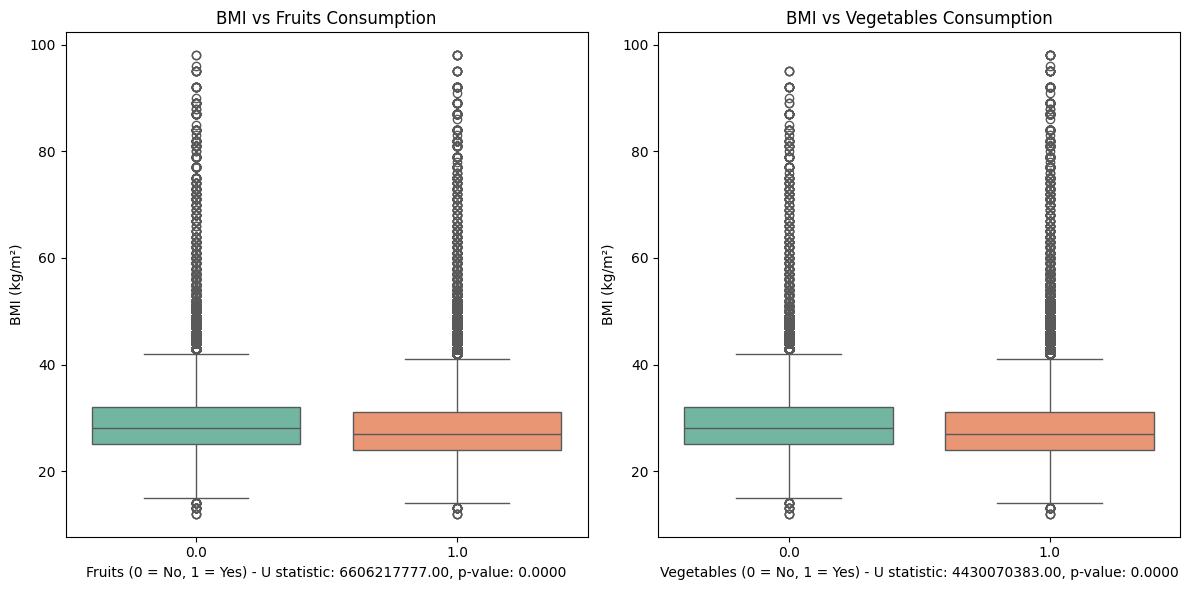

In [30]:

# BMI vs Fruits Consumption

# Mann-Whitney U Test for BMI and Fruits
bmi_fruits_1 = df[df['Fruits'] == 1]['BMI']
bmi_fruits_0 = df[df['Fruits'] == 0]['BMI']

stat_fruits, p_value_fruits = mannwhitneyu(bmi_fruits_1, bmi_fruits_0)

print(f"Mann-Whitney U Test Results for BMI vs Fruits:")
stat1 = f"U statistic: {stat_fruits:.2f}, p-value: {p_value_fruits:.4f}"
print(stat1)

# BMI vs Vegetables Consumption

# Mann-Whitney U Test for BMI and Veggies
bmi_veggies_1 = df[df['Veggies'] == 1]['BMI']
bmi_veggies_0 = df[df['Veggies'] == 0]['BMI']

stat_veggies, p_value_veggies = mannwhitneyu(bmi_veggies_1, bmi_veggies_0)

print(f"\nMann-Whitney U Test Results for BMI vs Veggies:")
stat2 = f"U statistic: {stat_veggies:.2f}, p-value: {p_value_veggies:.4f}"
print(stat2)

# Interpretation
if p_value_fruits < 0.05:
    print("\nThere is a significant difference in BMI between people who consume fruits regularly and those who don't.")
else:
    print("\nThere is no significant difference in BMI between people who consume fruits regularly and those who don't.")

if p_value_veggies < 0.05:
    print("\nThere is a significant difference in BMI between people who consume vegetables regularly and those who don't.")
else:
    print("\nThere is no significant difference in BMI between people who consume vegetables regularly and those who don't.")

# Visualization

plt.figure(figsize=(12, 6))

# Boxplot for BMI vs Fruits
plt.subplot(1, 2, 1)
sns.boxplot(x='Fruits', y='BMI', data=df, hue='Fruits', palette='Set2', legend=False)
plt.title("BMI vs Fruits Consumption")
plt.xlabel(f"Fruits (0 = No, 1 = Yes) - {stat1}")
plt.ylabel("BMI (kg/m²)")

# Boxplot for BMI vs Vegetables
plt.subplot(1, 2, 2)
sns.boxplot(x='Veggies', y='BMI', data=df, hue='Veggies', palette='Set2', legend=False)
plt.title("BMI vs Vegetables Consumption")
plt.xlabel(f"Vegetables (0 = No, 1 = Yes) - {stat2}")
plt.ylabel("BMI (kg/m²)")

plt.tight_layout()
plt.show()

Chi2 = 60336.81, p-value = 0.0000



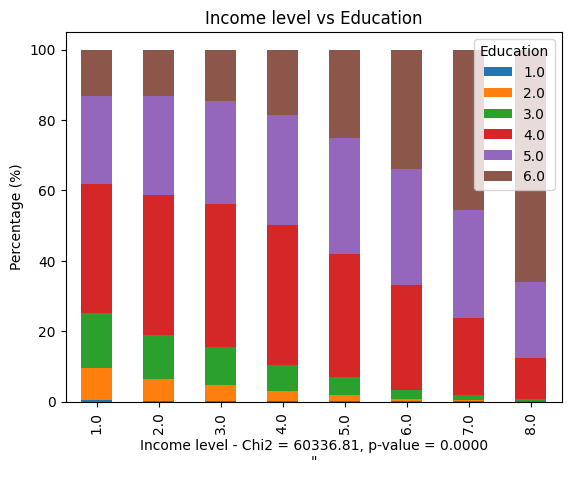

In [31]:
# Does income level relate to education access?
#There is a statistically significant association between income level and education level.
#"There is a statistically significant and moderate association between education and income (Cramér’s V = 0.22, p < 0.001), 
# suggesting that individuals with higher education levels are somewhat more likely to report higher income brackets.

table = pd.crosstab(df["Income"], df['Education'], normalize='index') * 100

# Chi-Square Test
contingency_table = pd.crosstab(df["Income"], df['Education'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
stat = f"Chi2 = {chi2:.2f}, p-value = {p:.4f}\n"
print(stat)

table.plot(kind='bar', stacked=True)
plt.title(f'Income level vs Education')
plt.ylabel('Percentage (%)')
plt.xlabel(f'Income level - {stat}"')
plt.show()

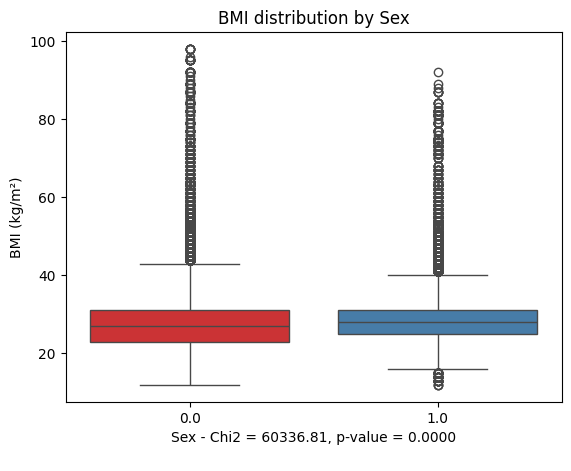

In [32]:
# Is there a relationship between Sex and BMI?

# Mann-Whitney U Test
male_bmi = df[df['Sex'] == 1]['BMI']
female_bmi = df[df['Sex'] == 0]['BMI']


# Boxplot
sns.boxplot(x='Sex', y='BMI', data=df, hue='Sex', palette="Set1", legend=False)
plt.title('BMI distribution by Sex')
plt.xlabel(f'Sex - {stat}')
plt.ylabel('BMI (kg/m²)')   
plt.show()

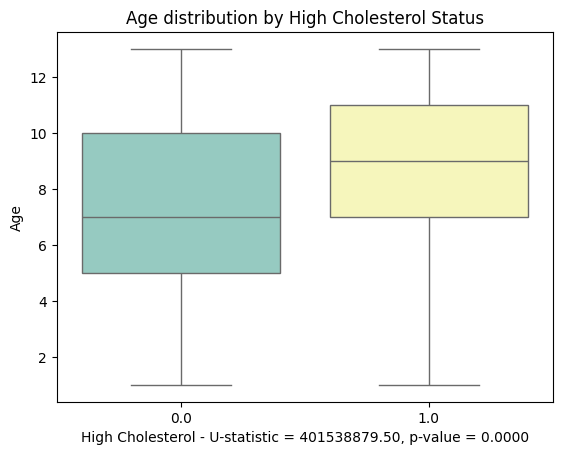

Mann-Whitney U Test for Age by HighChol: U-statistic = 401538879.50, p-value = 0.0000


In [33]:
# Are older people more likely to have High Cholesterol?

# Mann-Whitney U Test
chol_yes = df_sampled[df_sampled['HighChol'] == 1]['Age']
chol_no = df_sampled[df_sampled['HighChol'] == 0]['Age']

u_stat, p_val = mannwhitneyu(chol_yes, chol_no, alternative='two-sided')

stat = f"U-statistic = {u_stat:.2f}, p-value = {p_val:.4f}"

# Boxplot
sns.boxplot(x='HighChol', y='Age', data=df_sampled, palette="Set3", hue="HighChol", legend=False)
plt.title('Age distribution by High Cholesterol Status')
plt.xlabel(f'High Cholesterol - {stat}')
plt.ylabel('Age')
plt.show()

print(f"Mann-Whitney U Test for Age by HighChol: U-statistic = {u_stat:.2f}, p-value = {p_val:.4f}")

### Multivariate Analysis

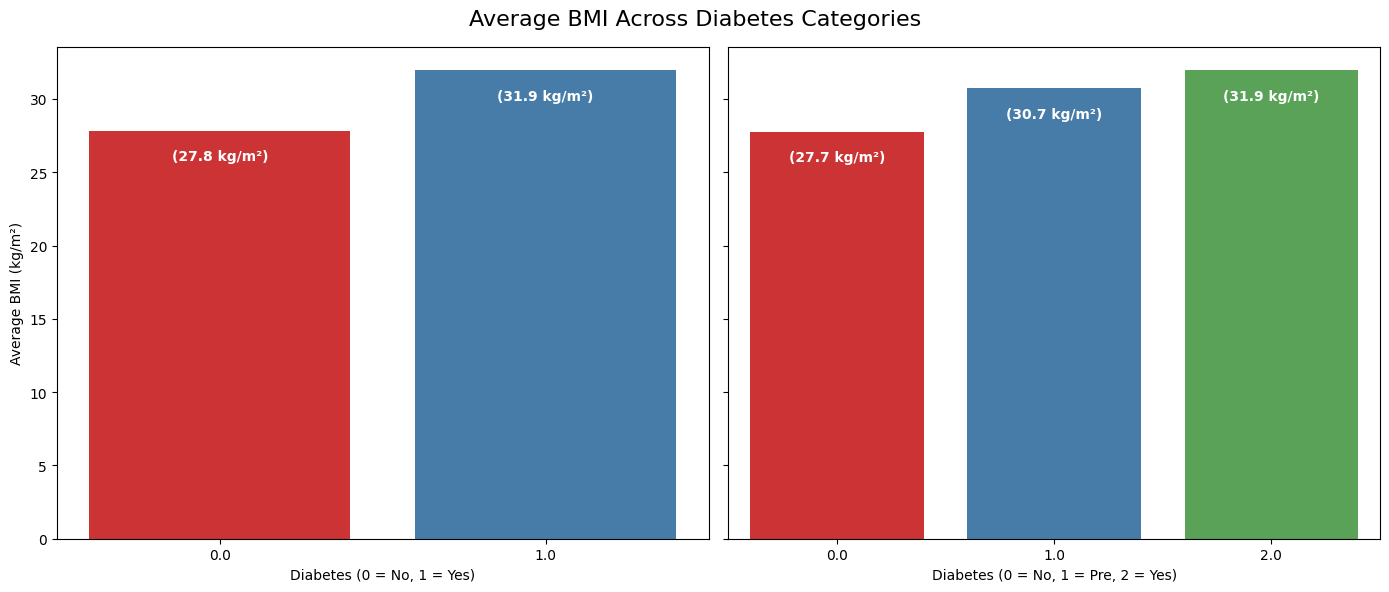

In [34]:
# BMI average for each categorie of diabetes

grouped_b = df.groupby("Diabetes_binary").agg({"BMI": "mean"}).reset_index()
grouped_t = df_t.groupby("Diabetes_012").agg({"BMI": "mean"}).reset_index()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

plt.suptitle("Average BMI Across Diabetes Categories", fontsize=16)

# Left plot: binary dataset
sns.barplot(data=grouped_b, x="Diabetes_binary", y="BMI", ax=axes[0],
            hue="Diabetes_binary", palette="Set1", legend=False)
axes[0].set_xlabel("Diabetes (0 = No, 1 = Yes)")
axes[0].set_ylabel("Average BMI (kg/m²)")

for index, row in grouped_b.iterrows():
    axes[0].text(x=index, y=row["BMI"] - 2, s=f"({row['BMI']:.1f} kg/m²)", ha='center', color='white', fontweight='bold')

# Right plot: ternary dataset
sns.barplot(data=grouped_t, x="Diabetes_012", y="BMI", ax=axes[1],
            hue="Diabetes_012", palette="Set1", legend=False)
axes[1].set_xlabel("Diabetes (0 = No, 1 = Pre, 2 = Yes)")
axes[1].set_ylabel("")

for index, row in grouped_t.iterrows():
    axes[1].text(x=index, y=row["BMI"] - 2, s=f"({row['BMI']:.1f} kg/m²)", ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

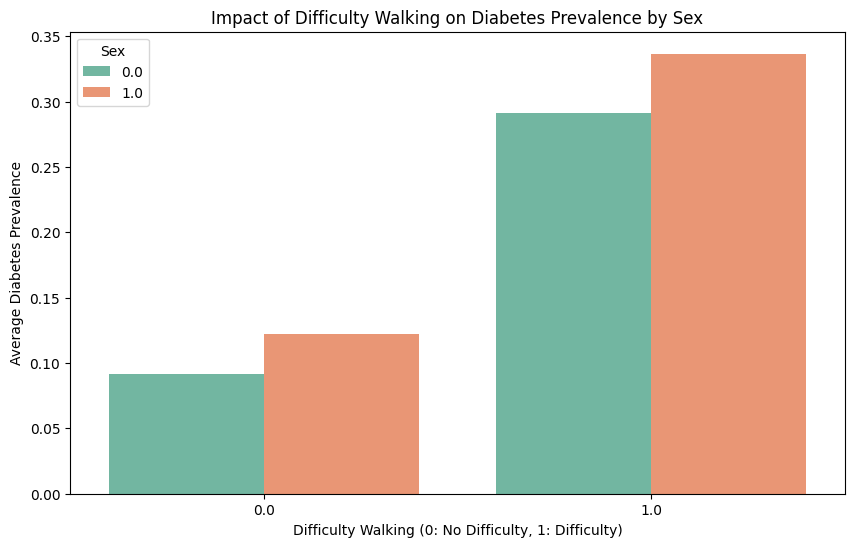

In [35]:
# Impact of Difficulty Walking on Diabetes Prevalence by Sex
# Adapted from https://www.kaggle.com/code/mohamedelsayedaffan/diabetes-classification-and-deployment
grouped2= df.groupby(['Sex', 'DiffWalk'])['Diabetes_binary'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='DiffWalk', y='Diabetes_binary', hue='Sex', data=grouped2, palette="Set2")
plt.xlabel('Difficulty Walking (0: No Difficulty, 1: Difficulty)')  
plt.ylabel('Average Diabetes Prevalence')
plt.title('Impact of Difficulty Walking on Diabetes Prevalence by Sex')
plt.show()

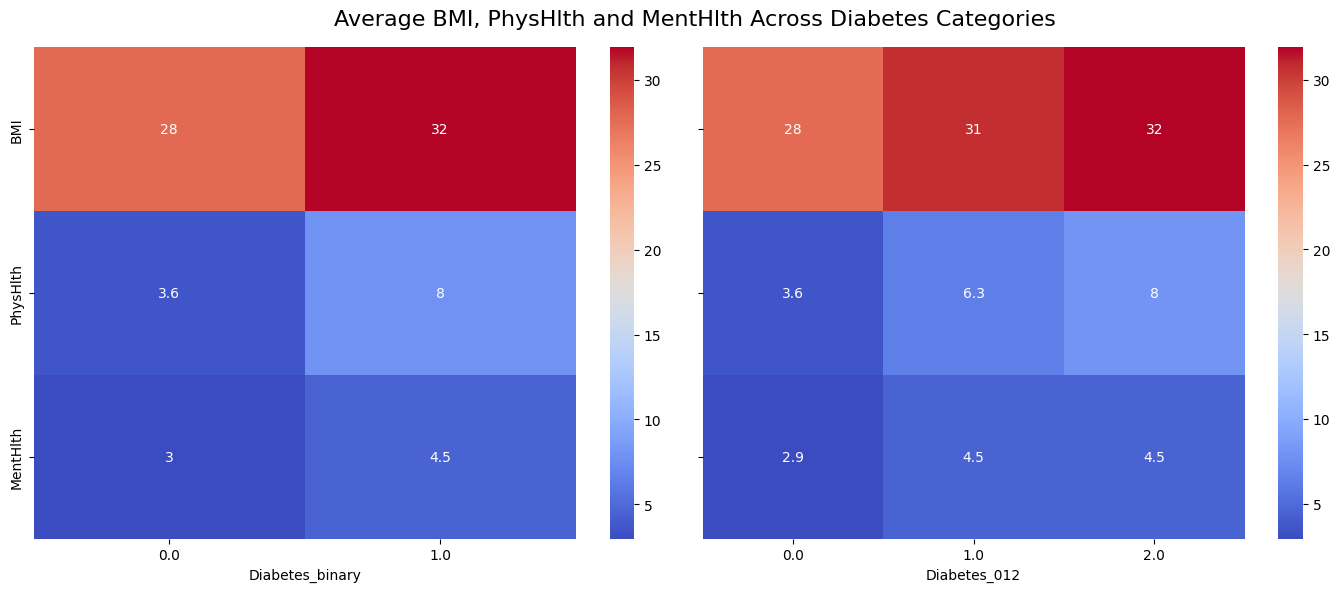

In [36]:
# BMI, PhysHlth and MentHlth average for each categorie of diabetes

grouped_b3 = grouped = df.groupby("Diabetes_binary").agg({
    "BMI": "mean",
    "PhysHlth": "mean",
    "MentHlth": "mean"
})

grouped_t3 = grouped = df_t.groupby("Diabetes_012").agg({
    "BMI": "mean",
    "PhysHlth": "mean",
    "MentHlth": "mean"
})

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

plt.suptitle("Average BMI, PhysHlth and MentHlth Across Diabetes Categories", fontsize=16)

# Left plot: binary dataset
sns.heatmap(grouped_b3.T, annot=True, cmap="coolwarm", ax=axes[0])

# Right plot: ternary dataset
sns.heatmap(grouped_t3.T, annot=True, cmap="coolwarm", ax=axes[1])

plt.tight_layout()
plt.show()

# Phase 1 - Preprocessing for both Datasets

In [37]:
# Removing duplicates

df.drop_duplicates(inplace = True)
print(f"Remaining duplicates: {df.duplicated().sum()}.")

df_t.drop_duplicates(inplace = True)
print(f"Remaining duplicates: {df.duplicated().sum()}.")

Remaining duplicates: 0.
Remaining duplicates: 0.


In [38]:
# Feature selection based only on the heatmaps and conclusion on EDA

columns_del = ["PhysHlth","Veggies","NoDocbcCost"]
df.drop(columns=columns_del)
df.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [39]:
# WITHOUT FEATURE SELECTION!

### Preparing the data before and after the Data Splitting

### First Data Splitting

In [40]:
# Checking the class distribution before balancing

# Binary Dataset
print("[Binary] Before balancing:", Counter(df['Diabetes_binary']))

X2 = df.drop(columns=['Diabetes_binary'])
y2 = df['Diabetes_binary']

# Ternary Dataset
print("[Ternary] Before balancing:", Counter(df_t['Diabetes_012']))

X3 = df_t.drop(columns=['Diabetes_012'])
y3 = df_t['Diabetes_012']

[Binary] Before balancing: Counter({0.0: 194377, 1.0: 35097})
[Ternary] Before balancing: Counter({0.0: 190055, 2.0: 35097, 1.0: 4629})


##### Data Splitting into Train and Test

In [41]:
# Binary Dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Ternary Dataset
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

##### Normalize data

In [ ]:
# Binary Dataset
#scaler = MinMaxScaler()

#X_train_normalized = scaler.fit_transform(X_train2)
#X_test_normalized = scaler.transform(X_test2)

# Ternary Dataset

#X_train_normalized = scaler.fit_transform(X_train3)
#X_test_normalized = scaler.transform(X_test3)

##### Standartize Data

In [43]:
#Binary Dataset
scaler = StandardScaler()

X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

# Ternary Dataset

X_train_scaled3= scaler.fit_transform(X_train3)
X_test_scaled3 = scaler.transform(X_test3) 

##### Balancing datasets using Oversampling (SMOTE ENN or SMOTE) and Undersampling (Random Undersampling) 

In [ ]:
# SMOTE ENN for Oversampling/undersampling

# Binary Dataset
smote_enn2 = SMOTEENN(random_state=42, n_jobs=-1, sampling_strategy=0.6)
X_train_resampled2, y_train_resampled2 = smote_enn2.fit_resample(X_train_scaled2, y_train2)
print("[Binary] After SMOTE ENN:", Counter(y_train_resampled2))

# Ternary Dataset
smote_enn3 = SMOTEENN(random_state=42, n_jobs=-1, sampling_strategy="auto")
X_train_resampled3, y_train_resampled3 = smote_enn3.fit_resample(X_train_scaled3, y_train3)

print("[Ternary] After SMOTE ENN:", Counter(y_train_resampled3))

[Binary] After SMOTE ENN: Counter({0.0: 101444, 1.0: 65957})
[Ternary] After SMOTE ENN: Counter({1.0: 147992, 2.0: 129965, 0.0: 87989})


In [ ]:
# SMOTE for Oversampling

# Binary Dataset
#smote2 = SMOTE(random_state=42, n_jobs=-1, sampling_strategy=0.6)
#X_train_resampled2, y_train_resampled2 = smote2.fit_resample(X_train_scaled2, y_train2)
#print("[Binary] After SMOTE:", Counter(y_train_resampled2))

# Ternary Dataset
#smote3 = SMOTE(random_state=42, n_jobs=-1, sampling_strategy="auto")
#X_train_resampled3, y_train_resampled3 = smote3.fit_resample(X_train_scaled3, y_train3)

#print("[Ternary] After SMOTE:", Counter(y_train_resampled3))

In [46]:
# Random Undersampling

# Binary Dataset
undersample2 = RandomUnderSampler(sampling_strategy="auto", random_state=17)
X_resampled2, y_resampled2 = undersample2.fit_resample(X_train_resampled2, y_train_resampled2)

print("[Binary] After Undersampling:", Counter(y_resampled2))

# Ternary Dataset
undersample3 = RandomUnderSampler(sampling_strategy="auto", random_state=17)
X_resampled3, y_resampled3 = undersample3.fit_resample(X_train_resampled3, y_train_resampled3)

print("[Ternary] After Undersampling:", Counter(y_resampled3))

[Binary] After Undersampling: Counter({0.0: 65957, 1.0: 65957})
[Ternary] After Undersampling: Counter({0.0: 87989, 1.0: 87989, 2.0: 87989})


##### Checking train target balance

In [47]:
# Binary Dataset
samples2 = y_resampled2.value_counts().sort_index()
total_cases = y_resampled2.shape[0]
diabetes_percent = (samples2 / total_cases) * 100
print(diabetes_percent)

# Ternary Dataset
samples3 = y_resampled3.value_counts().sort_index()
total_cases = y_resampled3.shape[0]
diabetes_percent = (samples3 / total_cases) * 100
print(diabetes_percent)

Diabetes_binary
0.0    50.0
1.0    50.0
Name: count, dtype: float64
Diabetes_012
0.0    33.333333
1.0    33.333333
2.0    33.333333
Name: count, dtype: float64


##### Checking test target balance

In [48]:
# Binary Dataset

samples2 = y_test2.value_counts().sort_index()
total_cases = y_test2.shape[0]
diabetes_percentage = (samples2 / total_cases) * 100
print(diabetes_percentage)
# Ternary Dataset
samples3 = y_test3.value_counts().sort_index()
total_cases = y_test3.shape[0]
diabetes_percentage = (samples3 / total_cases) * 100
print(diabetes_percentage)

Diabetes_binary
0.0    84.569125
1.0    15.430875
Name: count, dtype: float64
Diabetes_012
0.0    82.938399
1.0     1.971408
2.0    15.090193
Name: count, dtype: float64


##### PCA - Binary Dataset

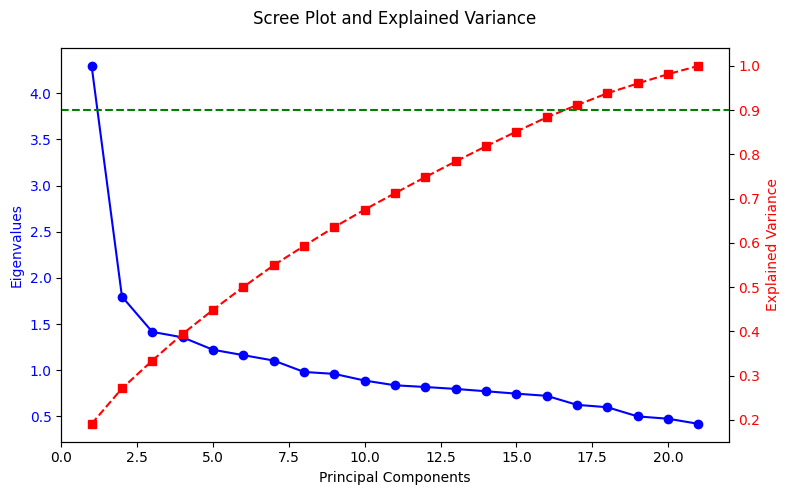

In [49]:
# Generating graphic
pca_gr = PCA() 

pca_gr.fit(X_resampled2)

explained_variance = pca_gr.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

eigenvalues = pca_gr.singular_values_ ** 2 / (len(X_resampled2) - 1)
fig, ax1 = plt.subplots(figsize=(8, 5))

# Eigenvalues
ax1.set_xlabel("Principal Components")
ax1.set_ylabel("Eigenvalues", color="b")
ax1.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-', color="b", label="Eigenvalues")
ax1.tick_params(axis='y', labelcolor="b")

# Explained Variance
ax2 = ax1.twinx()
ax2.set_ylabel("Explained Variance", color="r")
ax2.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='s', linestyle='--', color="r")
ax2.tick_params(axis='y', labelcolor="r")

# Setting horizontal line for 90% explained variance
ax2.axhline(y=0.9, color='g', linestyle='--')

fig.suptitle("Scree Plot and Explained Variance")
fig.tight_layout()
plt.show()

In [ ]:
# Using PCA 

pca = PCA(n_components=17) 

X_train_scaled2 = pca.fit_transform(X_resampled2)
X_test_scaled2 = pca.transform(X_test_scaled2)

##### PCA - Ternary Dataset

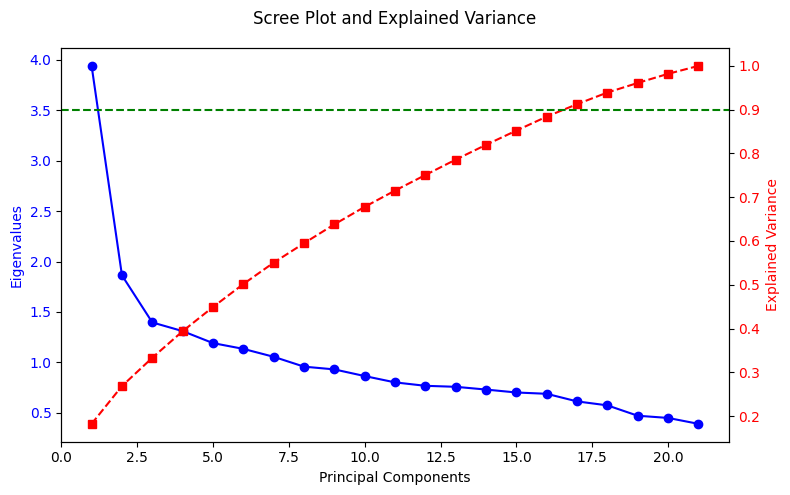

In [51]:
# Generating graphic
pca_gr3 = PCA() 

pca_gr3.fit(X_resampled3)

explained_variance = pca_gr3.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

eigenvalues = pca_gr3.singular_values_ ** 2 / (len(X_resampled3) - 1)
fig, ax1 = plt.subplots(figsize=(8, 5))

# Eigenvalues
ax1.set_xlabel("Principal Components")
ax1.set_ylabel("Eigenvalues", color="b")
ax1.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-', color="b", label="Eigenvalues")
ax1.tick_params(axis='y', labelcolor="b")

# Explained Variance
ax2 = ax1.twinx()
ax2.set_ylabel("Explained Variance", color="r")
ax2.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='s', linestyle='--', color="r")
ax2.tick_params(axis='y', labelcolor="r")

# Setting horizontal line for 90% explained variance
ax2.axhline(y=0.9, color='g', linestyle='--')

fig.suptitle("Scree Plot and Explained Variance")
fig.tight_layout()
plt.show()

In [ ]:
# Using PCA 
pca = PCA(n_components=17) 

X_train_scaled3 = pca.fit_transform(X_resampled3)
X_test_scaled3 = pca.transform(X_test_scaled3)

# Models Implementation

### Baselines for SVM, NN, RF

In [53]:
# Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")


NameError: name 'X_train' is not defined

### Testing Hyperparameter Tuning

##### ... Fine-Tuning Guidance

##### ... Fine-Tuning Guidance

##### ... Fine-Tuning Guidance